In [ ]:
#| echo: false

---
title: "Your Notebook Title"
author: "Your Name"
date: "YYYY-MM-DD"
execute:
    echo: false
format:
    html:
        toc: true
        toc-depth: 2
        code-fold: true
---

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./telco-customer-churn.csv')

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


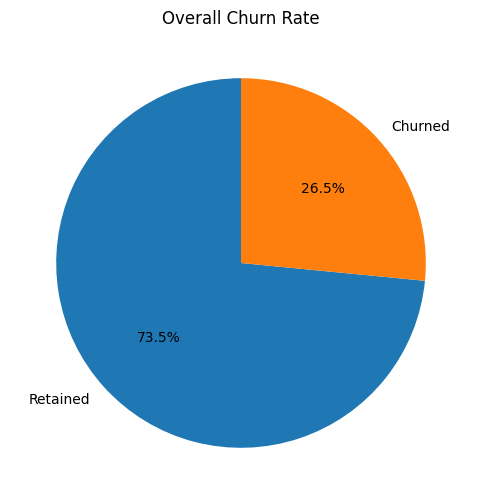

In [4]:
# 1. Overall churn rate visualization
plt.figure(figsize=(8, 6))
churn_rate = df['Churn'].value_counts(normalize=True)
plt.pie(churn_rate, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.title('Overall Churn Rate')
plt.show()


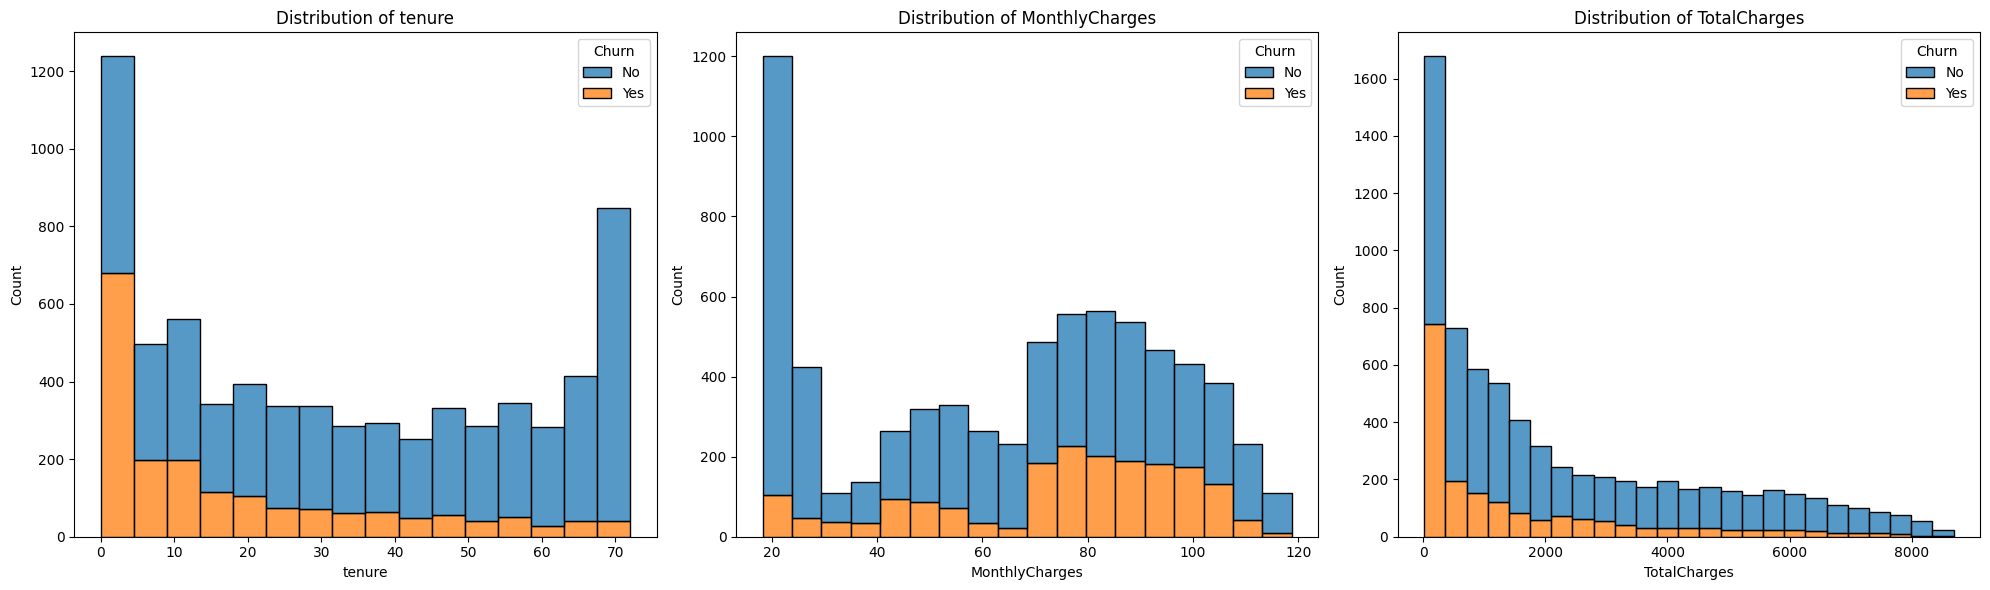

In [5]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, feature in enumerate(numerical_features):
    if feature == 'TotalCharges':
        df[feature] = pd.to_numeric(df[feature], errors='coerce')  # Convert to numeric
    sns.histplot(data=df, x=feature, hue='Churn', multiple="stack", ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


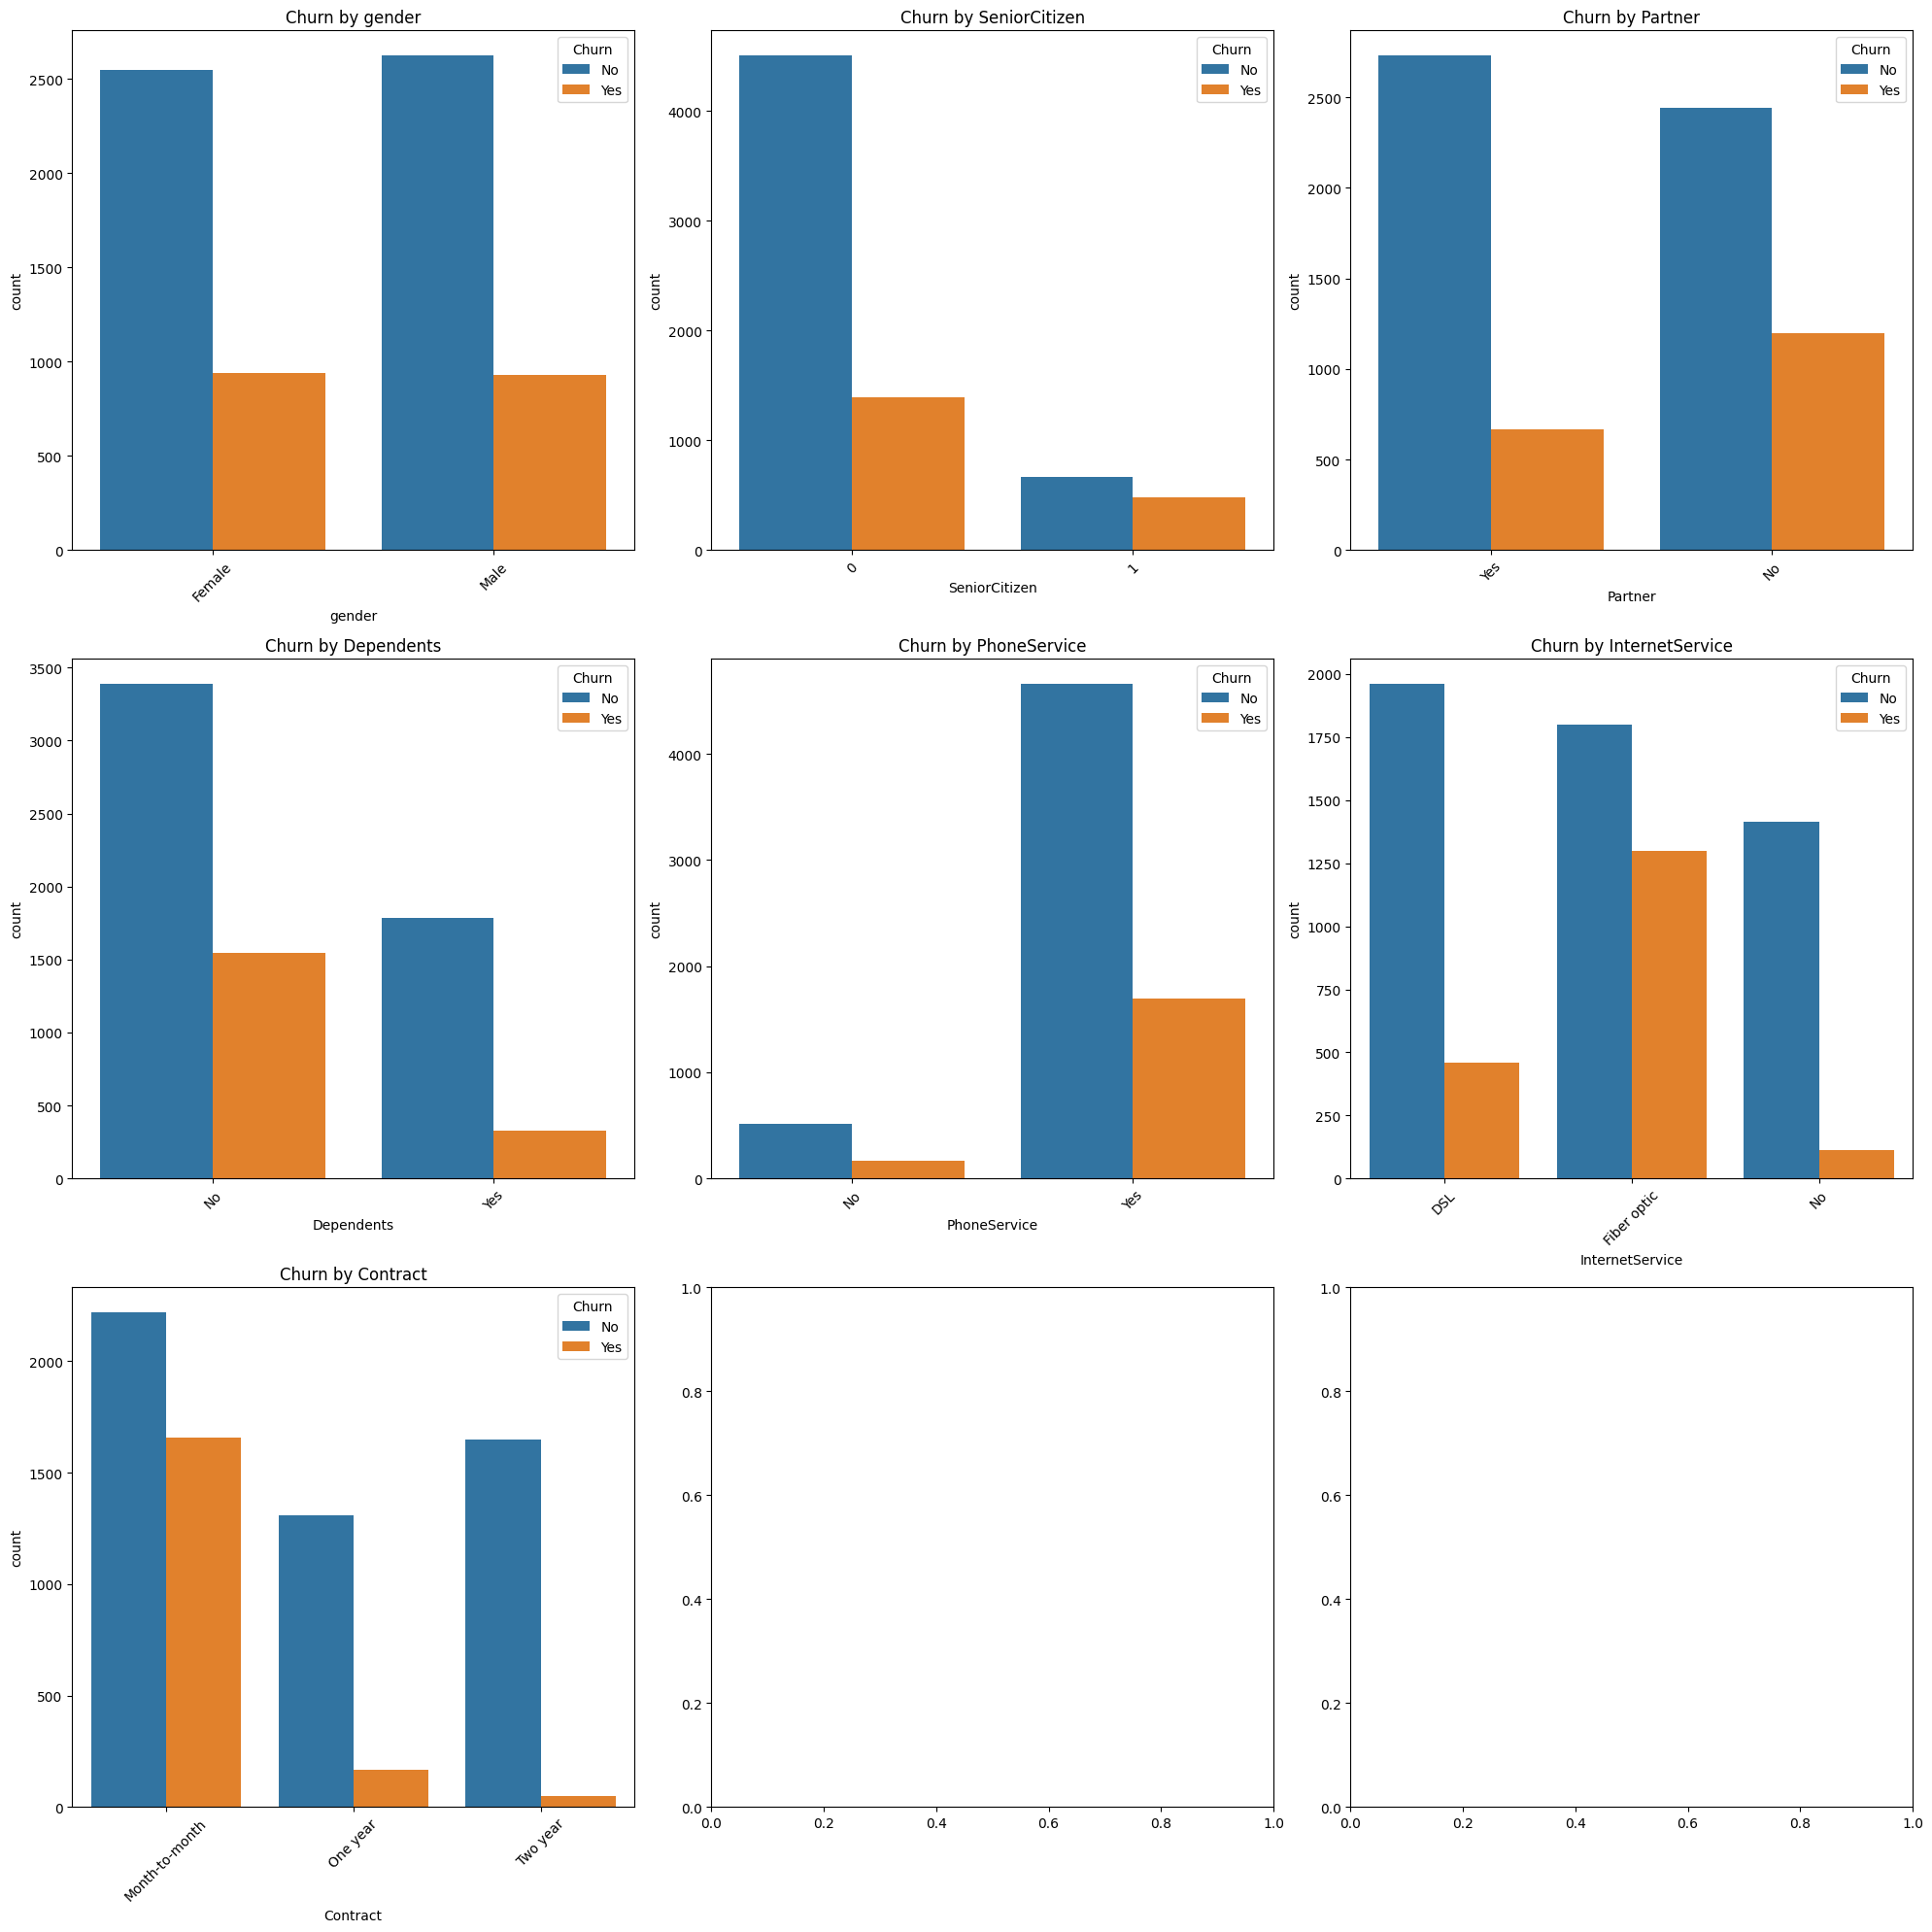

In [6]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract']
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn by {feature}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# correlation_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)  # Ensure SeniorCitizen is treated as numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
correlation_matrix = df[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


NameError: name 'correlation_features' is not defined

/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_56397/1654394309.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()


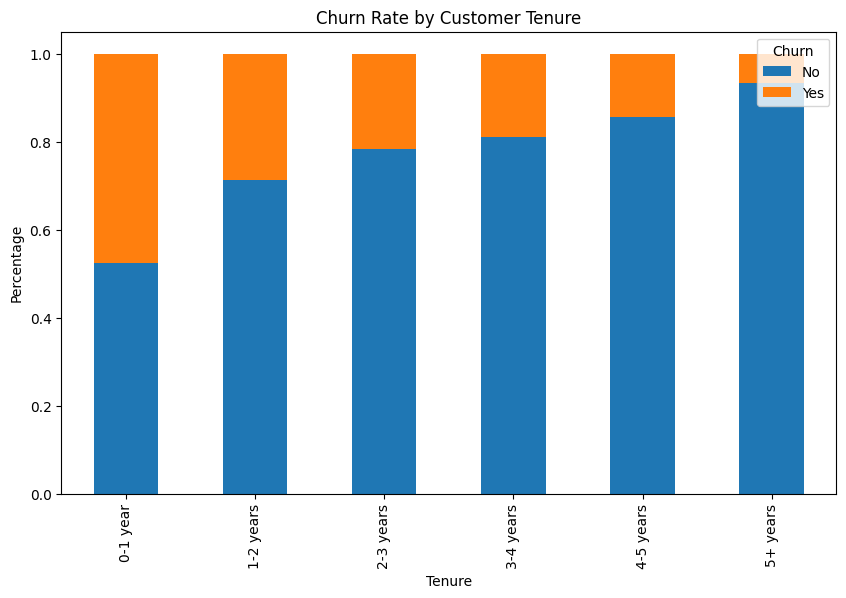

In [31]:
# 5. Churn rate by customer tenure
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, np.inf], labels=['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5+ years'])
churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()
churn_by_tenure.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Rate by Customer Tenure')
plt.xlabel('Tenure')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')
plt.show()

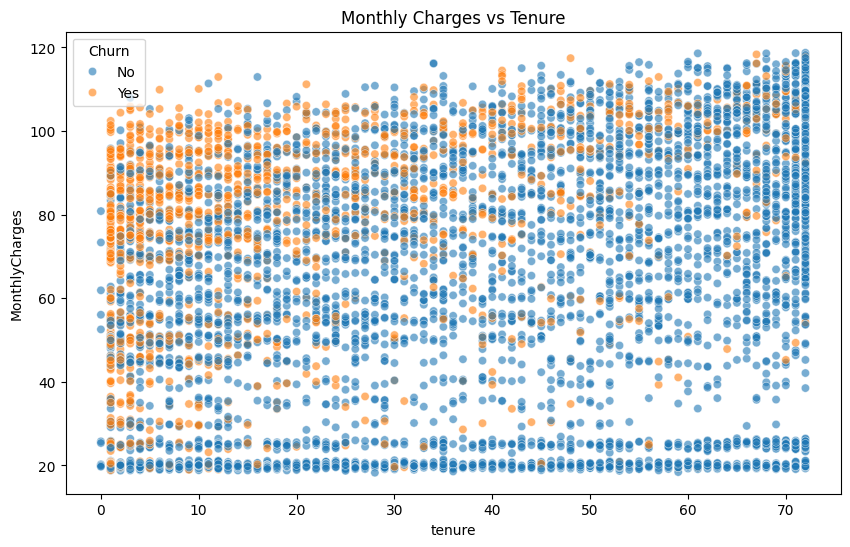

In [32]:
# 6. Monthly Charges vs Tenure colored by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title('Monthly Charges vs Tenure')
plt.show()